# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = json.load(open('data.json'))

In [3]:
solutions = pd.read_csv('Solutions.csv')

In [4]:
from sequences.non_linear_recurrence_relations import *

# Non Linear Recurrence

Solving Type 1


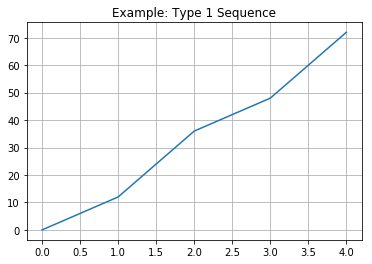


Solved type 1: 8324 (3.77%)
Solving Type 2


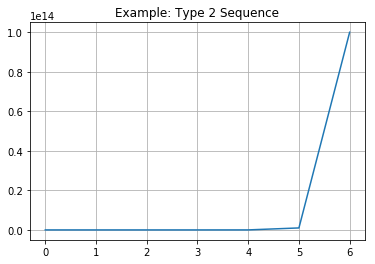


Solved type 2: 9481 (4.3%)
Solving Type 3


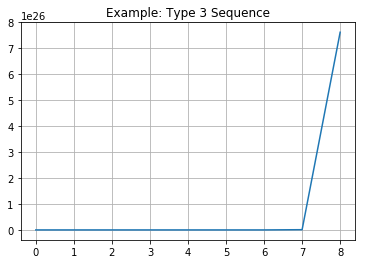


Solved type 3: 10468 (4.74%)
Solving Type 4


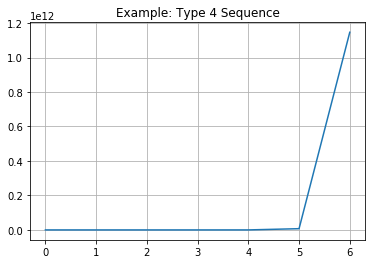


Solved type 4: 15223 (6.9%)
Solving Type 5


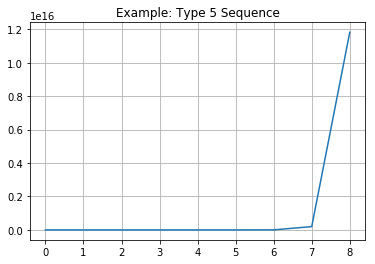

E:\Coding\Integer-Sequence-Learning\sequences\non_linear_recurrence_relations.py:147: RuntimeWarning: overflow encountered in multiply
  predict = np.sum(coeffs*np.array([1, i, i*i, seq[i-1], seq[i-2]]))



Solved type 5: 16736 (7.59%)
Solving Type 6


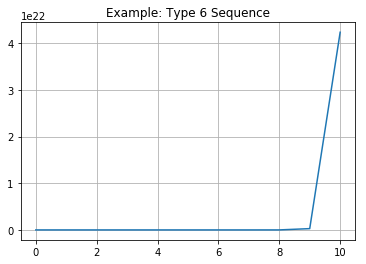


Solved type 6: 17134 (7.77%)
Solving Type 7


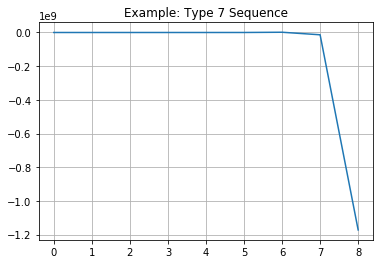

E:\Coding\Integer-Sequence-Learning\sequences\non_linear_recurrence_relations.py:209: RuntimeWarning: overflow encountered in multiply
  predict = np.sum(coeffs*np.array([1, i, seq[i-1], seq[i-2], seq[i-1]*seq[i-2]]))
D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Solved type 7: 6312 (2.86%)
Solving Type 8


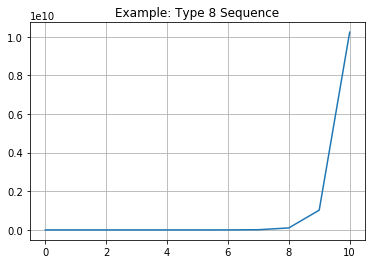


Solved type 8: 6358 (2.88%)
Solving Type 9


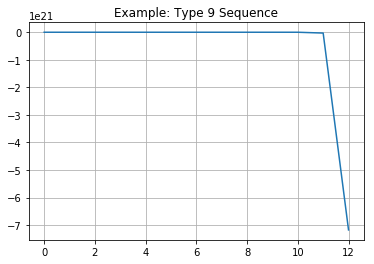


Solved type 9: 6003 (2.72%)
Solving Type 10


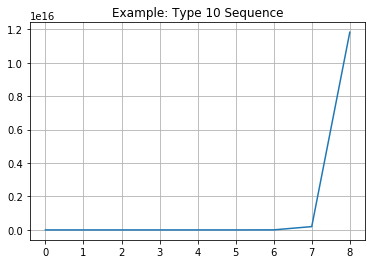


Solved type 10: 17649 (8.0%)
Solving Type 11


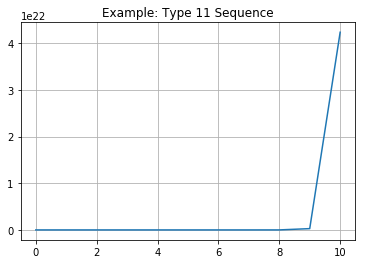


Solved type 11: 18473 (8.37%)
Solving Type 12


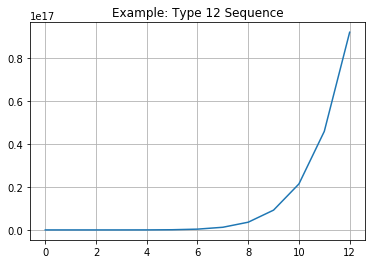


Solved type 12: 18655 (8.46%)
Solving Type 13


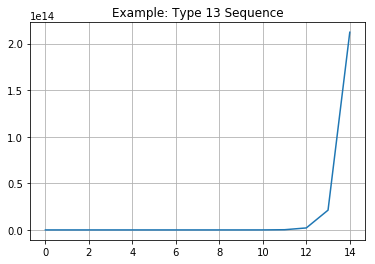


Solved type 13: 4483 (2.03%)
Solving Type 14


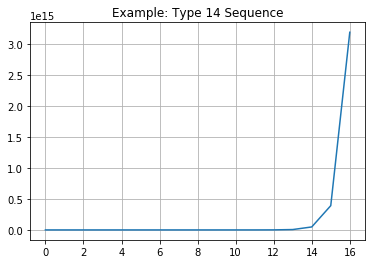


Solved type 14: 3807 (1.73%)
Solving Type 15


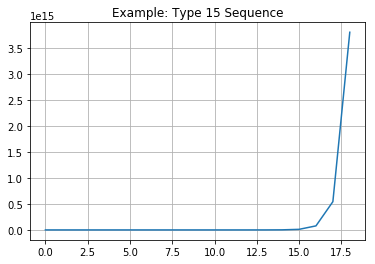


Solved type 15: 3735 (1.69%)
Solving Type 16


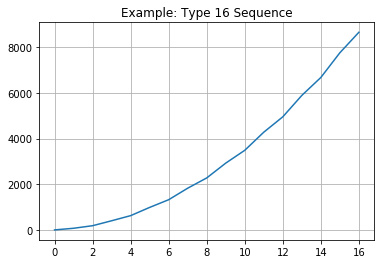


Solved type 16: 2472 (1.12%)
Solving Type 17


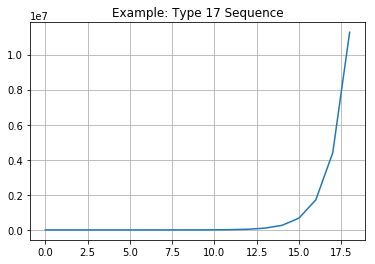


Solved type 17: 2175 (0.99%)
Solving Type 18


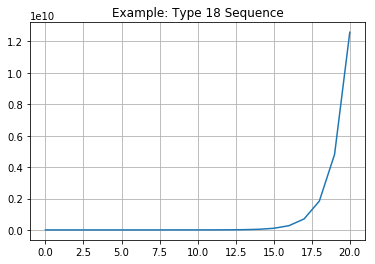


Solved type 18: 2113 (0.96%)


In [5]:
for t in range(1, 19):
    print(f'Solving Type {t}')
    solutions[f'nr{t}'] = 0
    count = 0
    func = eval(f'checkNonLinearRecurrence{t}')
    for i in trange(len(data)):
        seq = data[i]
        coeff = func(seq)
        if coeff:
            count += 1
            solutions.loc[i, 'Solved'] = 1
            solutions.loc[i, f'nr{t}'] = 1
            if count == 1:
                fig, ax = plt.subplots()
                ax.plot(seq)
                ax.grid()
                ax.set_title(f'Example: Type {t} Sequence')
                plt.show()

    print(f'Solved type {t}: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [6]:
solutions.drop(['Id'], axis=1).mean(0).mul(100).round(2).astype(str) + '%'

Solved    35.35%
r10        8.04%
r9         9.51%
r8        10.47%
r7        10.24%
r6         9.24%
r5         8.27%
r4         7.76%
r3         6.78%
r2         4.19%
r1         0.75%
p10        2.11%
p9         2.16%
p8         2.16%
p7         2.11%
p6         2.08%
p5         1.88%
p4         1.72%
p3         1.44%
p2         1.11%
p1         0.54%
t-s        0.18%
t-p        0.14%
t-d        0.04%
t-py       0.03%
misc       6.41%
s1         0.01%
s2         0.05%
s3         0.04%
s5         0.07%
s7         0.07%
s9         0.13%
s11        0.08%
nr1        3.77%
nr2         4.3%
nr3        4.74%
nr4         6.9%
nr5        7.59%
nr6        7.77%
nr7        2.86%
nr8        2.88%
nr9        2.72%
nr10        8.0%
nr11       8.37%
nr12       8.46%
nr13       2.03%
nr14       1.73%
nr15       1.69%
nr16       1.12%
nr17       0.99%
nr18       0.96%
dtype: object

In [7]:
print('linear recurrence relations', round(solutions[[f'r{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')
print('polynomial sequences', round(solutions[[f'p{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')
print('triplets', round(solutions[['t-s', 't-p', 't-d', 't-py']].max(axis=1).mean() * 100, 2), '%')
print('miscellaneous', round(solutions[['misc']].max(axis=1).mean() * 100, 2), '%')
print('subsequence repetition', round(solutions[[f's{i}' for i in [1, 2, 3, 5, 7, 9, 11]]].max(axis=1).mean() * 100, 2), '%')
print('non linear recurrence relations', round(solutions[[f'nr{i}' for i in range(1, 19)]].max(axis=1).mean() * 100, 2), '%')

linear recurrence relations 29.04 %
polynomial sequences 2.59 %
triplets 0.33 %
miscellaneous 6.41 %
subsequence repetition 0.31 %
non linear recurrence relations 15.92 %


In [8]:
solutions.to_csv('Solutions.csv', index=False)